In [1]:
import LinearAlgebra
import Plots as plt

include("../lib/test_functions.jl")
import .TestFunctions: ackley

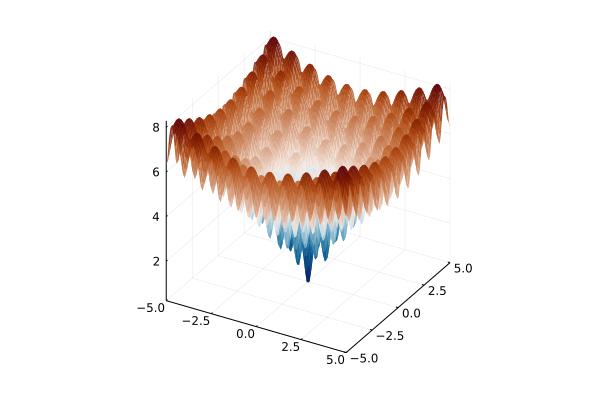

In [2]:
f = ackley(10.0)

xdomain = LinRange(-5, 5, 100)
ydomain = LinRange(-5, 5, 100)

plt.surface(xdomain, ydomain, (x, y) -> f([x, y]); opacity=0.9, colorbar=false, fill=(true, plt.cgrad(:vik)))

Optimum: x=[-0.0012, 0.0118]; f=0.02058621168935071

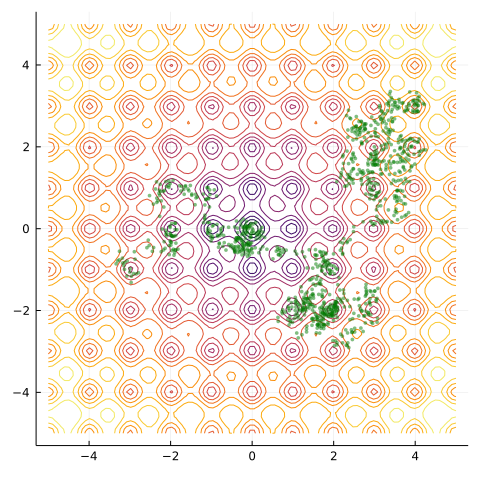

In [36]:
using Distributions
using Random

Random.seed!(3)

function simple_simulated_annealing(
  f::Base.Callable,
  x0::Vector{Float64},
  transition_distribution::ContinuousUnivariateDistribution,
  temperature::Float64;
  max_iter=20,
  max_traces=1e3
)
    x, y = x0, f(x0)
    x_best, y_best = x, y
    temperature_next = temperature
    dim = length(x0)
    traces = []
    trace_step_size = ceil(max_iter / max_traces)
    append!(traces, [x])
    for iter in 1:max_iter
      x_next = x + rand(transition_distribution, dim)
      y_next = f(x_next)
      Δy = y_next - y
      if Δy <= 0 || rand() < exp(-Δy/temperature_next) 
        x, y = x_next, y_next
      end
      if y_next < y_best
        x_best, y_best = x_next, y_next
      end
      next_t = temperature * log(2) / log(iter + 1)
      if iter % trace_step_size == 0
        append!(traces, [x_next])
      end
    end
    append!(traces, [x_best])
    return x_best, y_best, traces
end

x, y, traces = simple_simulated_annealing(f, [3.0, 2.0], Uniform(-2e-2, 2e-2), 5.0; max_iter=1e5, max_traces=1e3)
print("Optimum: x=$(round.(x, digits=4)); f=$y")
plot = plt.contour(xdomain, ydomain, (x, y) -> f([x, y]); colorbar=false, size=(480, 480))
plt.scatter(plot, [p[1] for p in traces], [p[2] for p in traces]; markersize=2, markeralpha=0.5, markerstrokewidth=0, legend=false, markercolor=:green)